# Name: Priti Chauhan
Batch: 1845

In [121]:
# For example, here's several helpful packages to load in 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
import sklearn.datasets


In [122]:
#To read the data
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [123]:
#EDA
#To check data type
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [124]:
#Brief view
df.head(4)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10


In [125]:
#dataset shows there are no NaN values but to check for sure
df.isnull().sum(axis=0)

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [126]:
#Feature Distirbution of data for Float and Int Data Type'''
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


According to Described Information:
1)No Feature has Minimum Value = 0, except Height
2)No Normal Distribution, ( Theortically if feature is normally distributed, Mean = Median = Mode ).
3)But Features are close to Normality
4)All numerical, Except Sex
5)Each Feature has Different Scale

<AxesSubplot:>

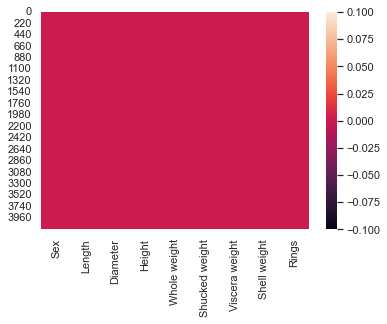

In [127]:
sns.heatmap(df.isnull())

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [129]:
#Numerical Features and Categorical Features
nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

In [130]:
#list of numerical features
nf

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [131]:
#List of categorial features
cf

Index(['Sex'], dtype='object')

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

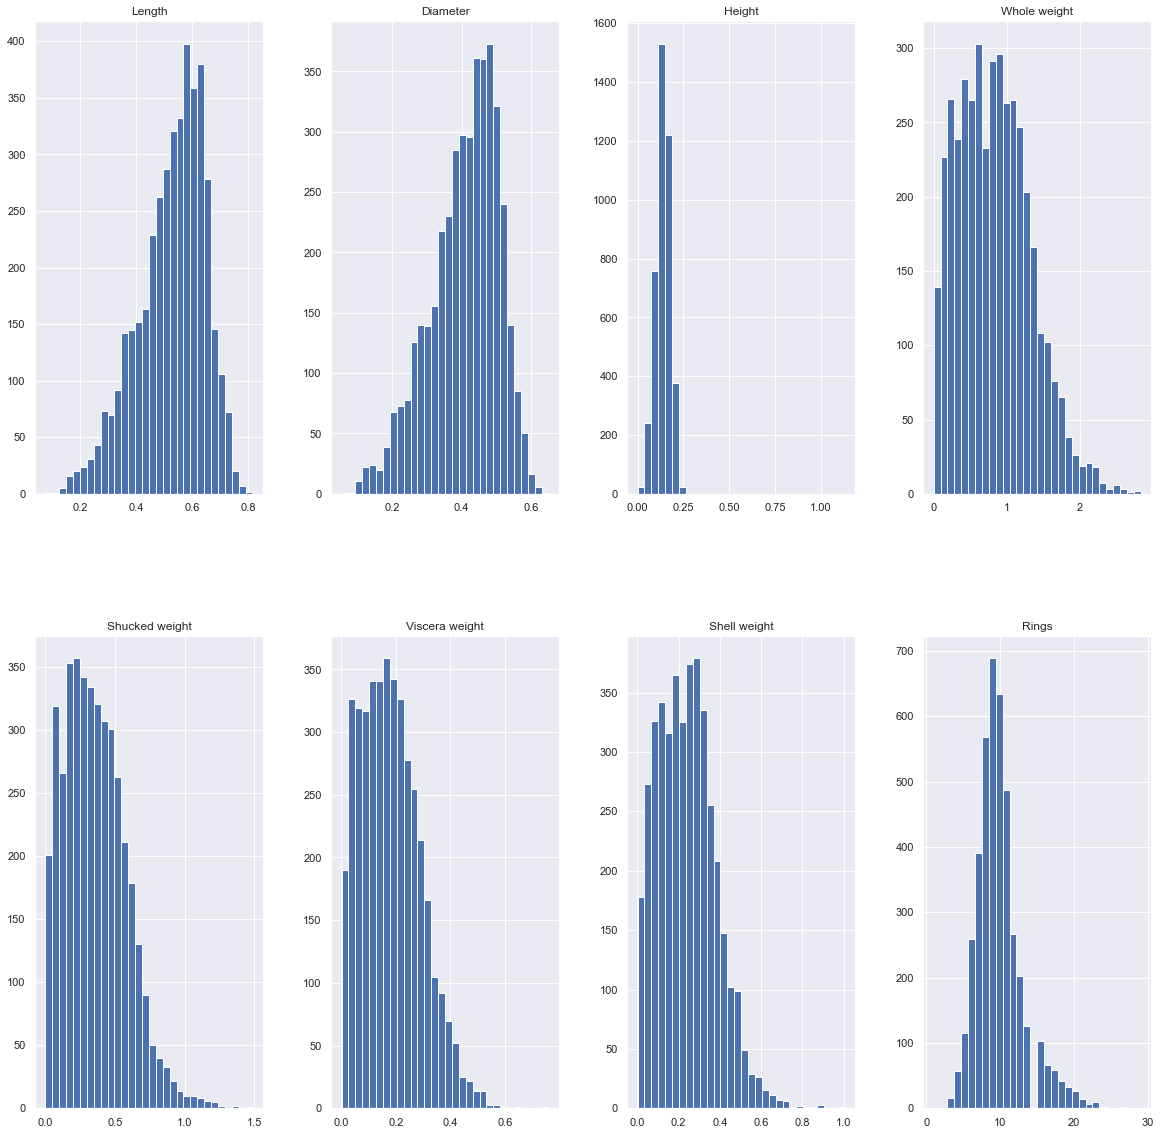

In [132]:
#Histogram : to see the numeric data distribution
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)

In [133]:
#After Seeing Above Graph of Data Distribution, I feel the Data is skewed, So checking for Skewness
skew_list = skew(df[nf],nan_policy='omit') #sending all numericalfeatures and omitting nan values
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)

In [134]:
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
2,Height,3.127694
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


According to the rules:
1.For a normally Distributed Data, Skewness should be greater than 0
  Skewness > 0 , More weight is on the right tail of the distribution

In [135]:
#Missing Values
mv_df = df.isnull().sum().sort_values(ascending = False)
pmv_df = (mv_df/len(df)) * 100
missing_df = pd.concat([mv_df,pmv_df], axis = 1, keys = ['Missing Values','% Missing'])

In [136]:
missing_df

,Missing Values,% Missing
Sex,0,0.0
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole weight,0,0.0
Shucked weight,0,0.0
Viscera weight,0,0.0
Shell weight,0,0.0
Rings,0,0.0


In [137]:
#Target Column Analysis
print("Value Count of Rings Column")
print(df.Rings.value_counts())
print("\nPercentage of Rings Column")
print(df.Rings.value_counts(normalize = True))

Value Count of Rings Column
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

Percentage of Rings Column
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
27    0.000479
24    0.000479
1     0.000239
26    0.000239
29    0.000239
2     0.000239
25    0.000239
Name: Rings, dtype: float64


In [138]:
#No. of Classes In Target
print(len(df.Rings.unique()))

28


# Visualization

<AxesSubplot:xlabel='Sex', ylabel='count'>

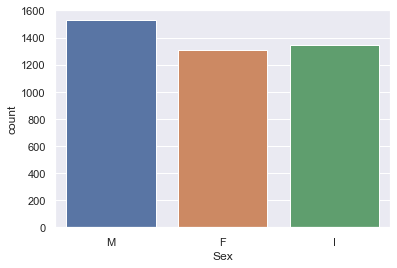

In [139]:
#Sex Count of Abalone, M - Male, F - Female, I - Infant
sns.countplot(x='Sex', data = df)

In [140]:
#Sex Ratio in Abalone
print("\nSex Count in Percentage")
print(df.Sex.value_counts(normalize = True))
print("\nSex Count in Numbers")
print(df.Sex.value_counts())


Sex Count in Percentage
M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

Sex Count in Numbers
M    1528
I    1342
F    1307
Name: Sex, dtype: int64


In [141]:
#Deriving Age from Rings Column, Age = Rings + 1.5
df['Age'] = df['Rings'] + 1.5
df['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='Age'>

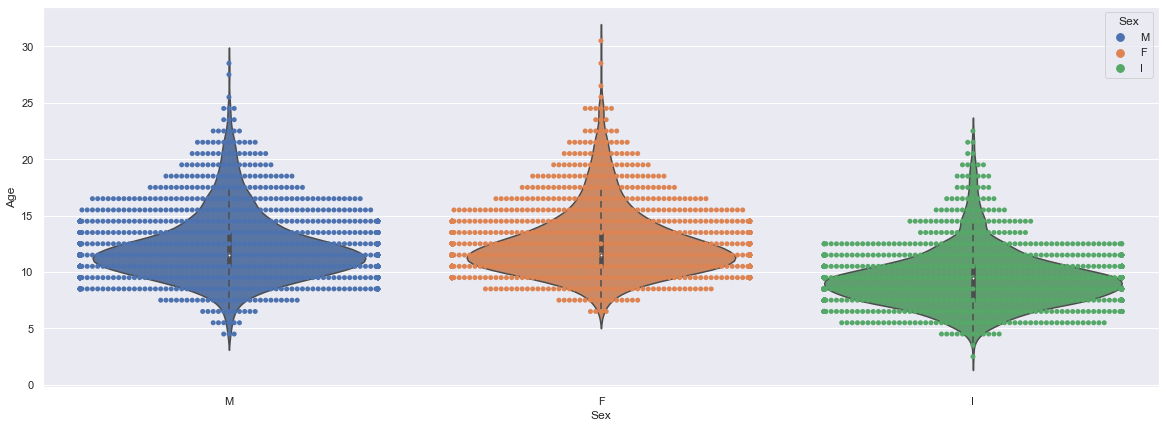

In [142]:
#Sex and Age Visualization
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = df)

According to The above Graph
Male : Majority Between 7.5 to 19
Female : Majority Between 8 to 19
Infant : Majority Between 6 to < 10

In [143]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 
                   'Shucked weight','Viscera weight', 'Shell weight', 'Age']].mean().sort_values(by = 'Age',ascending = False)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462


In [144]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [145]:
#Data splitting for model (train and test mode)
#Learning Features and Predicting Features
Xtrain = df.drop(['Rings','Sex'], axis = 1)
Ytrain = df['Rings']

In [146]:
#Train Test Split , 70:30 Ratio
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [147]:
#Logistic regression
#Creating Object of LogisticRegression
logreg = LogisticRegression()
#Learning from Training Set
logreg.fit(X_train, Y_train)
#Predicting for Training Set
Y_pred = logreg.predict(X_test)
#Accuracy Score
result_acc = accuracy_score(Y_test,Y_pred)

In [148]:
#For Both, LabelEncoding and OneHotEncoding -> The accuracy is 26 %
result_acc

0.45685279187817257

No of Classes : 2,
1 - Rings > 10
0 - Rings <= 10

In [149]:
#Creating New Target Variable
df['newRings'] = np.where(df['Rings'] > 10,1,0)

In [150]:
#Learning Features and Predicting Features
Xtrain = df.drop(['newRings','Rings','Sex'], axis = 1)
Ytrain = df['newRings']

In [151]:
#Train Test Split , 70:30 Ratio
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [152]:
#Creating Object of LogisticRegression
logreg = LogisticRegression()
#Learning from Training Set
logreg.fit(X_train, Y_train)
#Predicting for Training Set
Y_pred = logreg.predict(X_test)
#Accuracy Score
result_acc = accuracy_score(Y_test,Y_pred)

In [153]:
result_acc

1.0

Multi-Class Classification : When you have one target Column with 3 or more discreet values to predict, you state the problem as multi-class classification.

In [154]:
from sklearn import svm

In [155]:
#Learning and predicting features
Xtrain = df.drop(['Rings','Sex'], axis = 1)
Ytrain = df['Rings']

In [156]:
#Train Test Split , 70:30 Ratio
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [157]:
#Creating Object of SVM
svmModel = svm.SVC(kernel='linear', C=1, gamma=1) 
#Learning from Training Set
svmModel.fit(X_train, Y_train)
#Predicting for Training Set
Y_pred = svmModel.predict(X_test)
#Accuracy Score
result_acc = accuracy_score(Y_test,Y_pred) 

In [158]:
result_acc

0.9992748368382887

In [159]:
#Making a Copy of the primary DataSet
new_df = df.copy()

In [160]:
#Feature Engineering , class 1 - 1-8, class 2 - 9-8, class 3 - 11 >
new_df['newRings_1'] = np.where(df['Rings'] <= 8,1,0)
new_df['newRings_2'] = np.where(((df['Rings'] > 8) & (df['Rings'] <= 10)), 2,0)
new_df['newRings_3'] = np.where(df['Rings'] > 10,3,0)

In [161]:
new_df['newRings'] = new_df['newRings_1'] + new_df['newRings_2'] + new_df['newRings_3']

In [163]:
#Learning Features and Predicting Features
Xtrain = new_df.drop(['Rings','Sex','newRings_1','newRings_2','newRings_3'], axis = 1)
Ytrain = new_df['newRings']

In [164]:
#Train Test Split , 70:30 Ratio
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [165]:
#Creating Object of SVM
svmModel = svm.SVC(kernel='rbf', C=1, gamma=1) 
#Learning from Training Set
svmModel.fit(X_train, Y_train)
#Predicting for Training Set
Y_pred = svmModel.predict(X_test)
#Accuracy Score
result_acc = accuracy_score(Y_test,Y_pred) 

In [166]:
result_acc

1.0

Conclusion: I am concluding after searching the all data and model's accuracy that SVM(support vector machine) is doing best job to give 100% accuracy.